# DS-HW[1] Data Parsing and Cleansing

## Problem 1. Data Cleansing

### 1) Plot the data for each parameter.

In [123]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

data = pd.read_csv("/Users/kimdaehun/Desktop/dataset/ds_hw1_dataset.csv")



In [124]:
data

nSeq   DI   PORT4_CHN1   PORT6_CHN1   PORT7_CHN1
0          0    0          NaN      -0.4806       0.3770
1          1    0      -0.2104      -0.4819       0.3759
2          2    0      -0.2103      -0.4822          NaN
3          3    0      -0.2119      -0.4819       0.3806
4          4    0      -0.2148      -0.4812          NaN
...      ...  ...          ...          ...          ...
30445  30445    0          NaN      -0.6162       0.1777
30446  30446    0      -0.0034      -0.6157       0.1780
30447  30447    0      -0.0037      -0.6145       0.1772
30448  30448    0       0.0000      -0.6157       0.1820
30449  30449    0       0.0005      -0.6144       0.1855

[30450 rows x 5 columns]

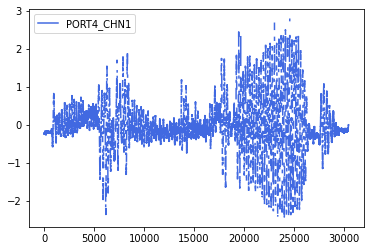

In [125]:
plt.plot(data[' PORT4_CHN1'], label = 'PORT4_CHN1',c='royalblue')
plt.legend()


데이터 에서 PORT4_CHN1 에 해당하는 열의 값들을 그래프로 나타낸 것으로, x축은 index, y축은 해당 데이터 값이다. 그래프를 보았을때 군데군데 비어 있는 부분이 보이는 것을 볼 수 있고, 이는 데이터 값중에서 NaN으로 인해 발생한 것이다.

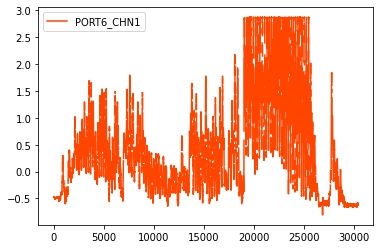

In [126]:
plt.plot(data[' PORT6_CHN1'], label = 'PORT6_CHN1',c='orangered')
plt.legend()


데이터 에서 PORT6_CHN1 에 해당하는 열의 값들을 그래프로 나타낸 것으로, x축은 index, y축은 해당 데이터 값이다. 그래프를 보았을때 군데군데 비어 있는 부분이 보이는 것을 볼 수 있고, 이는 데이터 값중에서 NaN으로 인해 발생한 것이다.

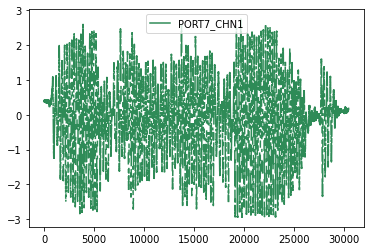

In [127]:
plt.plot(data[' PORT7_CHN1'], label = 'PORT7_CHN1',c='seagreen')
plt.legend()


데이터 에서 PORT7_CHN1 에 해당하는 열의 값들을 그래프로 나타낸 것으로, x축은 index, y축은 해당 데이터 값이다. 그래프를 보았을때 군데군데 비어 있는 부분이 보이는 것을 볼 수 있고, 이는 데이터 값중에서 NaN으로 인해 발생한 것이다.

### 2) Find the number of missing values for each parameter.

In [128]:
# fill the blank code
data.isnull().sum() #결측치 확인

nSeq               0
 DI                0
 PORT4_CHN1    10141
 PORT6_CHN1     2834
 PORT7_CHN1     6769
dtype: int64

isnull 을 통해 결측치를 보고, sum()을 통해 그 양을 더한다음 보였다.

### 3) Treat the missing values like this:

A) Delete data with missing values by using pandas.dropna().

In [129]:
# fill the blank code
Adata = data.copy() #데이터 복사본
Adata= Adata.dropna() # dropna를 통한 결측값 제거

In [130]:
print(Adata)

        nSeq   DI   PORT4_CHN1   PORT6_CHN1   PORT7_CHN1
1          1    0      -0.2104      -0.4819       0.3759
3          3    0      -0.2119      -0.4819       0.3806
8          8    0      -0.2209      -0.4796       0.3862
9          9    0      -0.2227      -0.4794       0.3859
10        10    0      -0.2253      -0.4786       0.3881
...      ...  ...          ...          ...          ...
30444  30444    0      -0.0078      -0.6147       0.1741
30446  30446    0      -0.0034      -0.6157       0.1780
30447  30447    0      -0.0037      -0.6145       0.1772
30448  30448    0       0.0000      -0.6157       0.1820
30449  30449    0       0.0005      -0.6144       0.1855

[14249 rows x 5 columns]


원본 데이터 파일 유지를 위해 copy 를 하고 카피된 데이터를
dropna()를 통해 결측치가 있는 index들을 다 빼버렸다. 

B) Replace the missing value with the average value within the window size (window=50) before and after the interval with missing values for each parameter.

In [131]:
def get_average(data, column, index, window): #들어오는 index 값 기준 앞 뒤 50개의 데이터 값의 평균을 구하는 함수
    wlist = [] #윈도우에 해당하는 데이터를 넣을 리스트 정의 및 초기화
    for i in range(index-window,index+1+window,1): #index기준 앞 뒤 window 크기 만큼, 증분 1
        if(0<i<len(data) )== True: #out of range 방지, i 가 데이터 인덱스 내에 존재할때만 계산
            if (data[column][i] < 0 or data[column][i] >= 0) == False: #해당 데이터 값이 결측 값인지 여부 판단
                continue
            else: #결측치가 아니라면 리스트에 추가한다
                wlist.append(data[column][i]) 
        
    avg_array = np.array(wlist) #array화 시켜준다.
    avg = np.mean(avg_array) #np.mean()을 이용해 평균을 구한다
    return avg #평균값 반환

In [132]:
Bdata = data.copy() #Bdata를 data를 copy해 초기화한다
window = 50 # window size를 과제에 명시한 대로 50이라 설정한다.

for column in [' PORT4_CHN1', ' PORT6_CHN1', ' PORT7_CHN1']: #3개의 column을 돌며
    for index in range(len(Bdata)): #index를 데이터 길이만큼 증가시키면서 값들을 확인
        if (Bdata[column][index] < 0 or Bdata[column][index] >= 0) == False: #값이 결측치 임을 판단하면
            Bdata[column][index] = get_average(data,column, index, window) #결측치를 문제 요구 사항대로 평균 값으로 변환한다.

/var/folders/5c/kcr959w56zz_1p5rkcrjp7dc0000gn/T/ipykernel_18222/1856698464.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bdata[column][index] = get_average(data,column, index, window) #결측치를 문제 요구 사항대로 평균 값으로 변환한다.


B단계는 결측치를 평균 값으로 대체하는 방법이다. get_average()함수를 만들어, 특정 인덱스 값 기준 윈도우 크기 만큼 전 후를 반복문을
통해 탐색한다. 이후 값들이 데이터 크기 내에 존재한다면, 결측값이라면 일단 넘어가고 결측치라고 판단되면 wlist라는 비어있는 리스트안에 집어 넣는다. 그 후 wlist를 array화 시킨다음 np.mean을 이용해 평균을 구하고 이를 함수에서 리턴시긴다.
그 후 마찬가지로 데이터를 Bdata로 카피하고, 3개의 데이터 프레임 열을 순차적으로 돌면서 각 인덱스를 확인하고, 결측치임을 판단하면 이번에는 get_average()를 통해 바뀐 값으로 결측치를 대체해서 결측치를 없애는 것이다.

In [133]:
print("before")
print(data) #이전 데이터
print("after")
print(Bdata) #평균값으로 클렌징한 데이터

before
        nSeq   DI   PORT4_CHN1   PORT6_CHN1   PORT7_CHN1
0          0    0          NaN      -0.4806       0.3770
1          1    0      -0.2104      -0.4819       0.3759
2          2    0      -0.2103      -0.4822          NaN
3          3    0      -0.2119      -0.4819       0.3806
4          4    0      -0.2148      -0.4812          NaN
...      ...  ...          ...          ...          ...
30445  30445    0          NaN      -0.6162       0.1777
30446  30446    0      -0.0034      -0.6157       0.1780
30447  30447    0      -0.0037      -0.6145       0.1772
30448  30448    0       0.0000      -0.6157       0.1820
30449  30449    0       0.0005      -0.6144       0.1855

[30450 rows x 5 columns]
after
        nSeq   DI   PORT4_CHN1   PORT6_CHN1   PORT7_CHN1
0          0    0    -0.227787      -0.4806     0.377000
1          1    0    -0.210400      -0.4819     0.375900
2          2    0    -0.210300      -0.4822     0.405217
3          3    0    -0.211900      -0.4819     0

nan값이 없어지고, 요구사항에 부합하는 평균값으로 대체된 것을 확인할 수 있다.

C) Replace the missing value with the median value within the window size (window=50) before and after the interval with missing values for each parameter.

In [134]:
def get_median(data, column, index, window): #들어오는 index 값 기준 앞 뒤 50개의 데이터 값의 median 값을 구하는 함수
    wlist = [] #윈도우에 해당하는 데이터를 넣을 리스트 정의 및 초기화
    for i in range(index-window,index+1+window,1): #index 기준 앞 뒤 window 크기 만큼 증분,1
        if(0<i<len(data) )== True: #해당 데이터 값이 결측 값인지 여부 판다
            if (data[column][i] < 0 or data[column][i] >= 0) == False: 
                continue
            else: #결측치가 아니라면 리스트에 추가한다
                wlist.append(data[column][i]) 
        
    median_array = np.array(wlist) #array화 시켜준다.
    mid = np.median(median_array) #np.mean()을 이ㅛㅇ해 median 값을 구한다
    return mid #median 값 반환

In [135]:
Cdata = data.copy() #Cdata를 data를 카피해 초기화한다.
window = 50 # window size는 과제에 명시된대로 50이라 설정한다.

for column in [' PORT4_CHN1', ' PORT6_CHN1', ' PORT7_CHN1']: #column을 돌면서
    for index in range(len(Cdata)): #index를 데이터 길이만큼 증가시키면서 데이터값을 확인
        if (Cdata[column][index] < 0 or Cdata[column][index] >= 0) == False: #값이 결측치 임을 판단하면
            Cdata[column][index] = get_median(data,column, index, window) #결측치를 문제 요구 사항 대로 median값으로 해당 값을 변경한다

/var/folders/5c/kcr959w56zz_1p5rkcrjp7dc0000gn/T/ipykernel_18222/98410052.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cdata[column][index] = get_median(data,column, index, window) #결측치를 문제 요구 사항 대로 median값으로 해당 값을 변경한다


C단계는 결측치를 median 값으로 대체하는 방법이다. get_median()함수를 만들어, 특정 인덱스 값 기준 윈도우 크기 만큼 전 후를 반복문을
통해 탐색한다. 이후 값들이 데이터 크기 내에 존재한다면, 결측값이라면 일단 넘어가고 결측치라고 판단되면 wlist라는 비어있는 리스트안에 집어 넣는다. 그 후 wlist를 array화 시킨다음 np.median을 이용해 평균을 구하고 이를 함수에서 리턴시긴다.
그 후 마찬가지로 데이터를 Cdata로 카피하고, 3개의 데이터 프레임 열을 순차적으로 돌면서 각 인덱스를 확인하고, 결측치임을 판단하면 이번에는 get_median()를 통해 바뀐 값으로 결측치를 대체해서 결측치를 없애는 것이다.

In [136]:
print("before")
print(data) #이전 원본 데이터
print("after")
print(Cdata) # median 값으로 클렌징한 데이터


before
        nSeq   DI   PORT4_CHN1   PORT6_CHN1   PORT7_CHN1
0          0    0          NaN      -0.4806       0.3770
1          1    0      -0.2104      -0.4819       0.3759
2          2    0      -0.2103      -0.4822          NaN
3          3    0      -0.2119      -0.4819       0.3806
4          4    0      -0.2148      -0.4812          NaN
...      ...  ...          ...          ...          ...
30445  30445    0          NaN      -0.6162       0.1777
30446  30446    0      -0.0034      -0.6157       0.1780
30447  30447    0      -0.0037      -0.6145       0.1772
30448  30448    0       0.0000      -0.6157       0.1820
30449  30449    0       0.0005      -0.6144       0.1855

[30450 rows x 5 columns]
after
        nSeq   DI   PORT4_CHN1   PORT6_CHN1   PORT7_CHN1
0          0    0     -0.22925      -0.4806       0.3770
1          1    0     -0.21040      -0.4819       0.3759
2          2    0     -0.21030      -0.4822       0.4084
3          3    0     -0.21190      -0.4819      

마찬가지로 nan 값이 사라지고 요구 조건에 부합하는 median값으로 결측치가 대체된 것을 확인할 수 있다.

D) Replace the missing value with the max value within the window size (window=50) before and after the interval with missing values for each parameter.

In [137]:
def get_max(data, column, index, window): #들어오는 index 값 기준 앞 뒤 50개의 데이터 값의 최대 값을 구하는 함수
    wlist = [] #윈도우에 해당하는 데이터를 넣을 리스트 정의 및 초기화
    for i in range(index-window,index+1+window,1): #index 기준 앞 뒤 window 크기만큼 증분 1씩
        if(0<i<len(data) )== True: #out of rnage 방지, i 가 데이터 인덱스 내에 존재할때만 계산
            if (data[column][i] < 0 or data[column][i] >= 0) == False: #해당 데이터 값이 결측 값인지 여부 판단
                continue
            else: #결측치가 아니라면 리스트에 추가한다.
                wlist.append(data[column][i]) 
        
    max_array = np.array(wlist) #array화 시켜준다.
    max = np.max(max_array) #np.max()를 사용해 최대 값을 구한다
    return max #최대값 반환

In [138]:
Ddata = data.copy() #Ddata를 data를 copy 해 초기화한다.
window = 50 #window size를 과제에 명시한 대로 50이라 설정한다.

for column in [' PORT4_CHN1', ' PORT6_CHN1', ' PORT7_CHN1']: #3개의 column을 돌며
    for index in range(len(Ddata)): #index를 데이터 길이만큼 증가시키면서 값들을 확인
        if (Ddata[column][index] < 0 or Ddata[column][index] >= 0) == False: # 값이 결측치 임을 판단하면 
            Ddata[column][index] = get_max(data,column, index, window) #결측치를 문제 요구사항대로 최대 값으로 변경

/var/folders/5c/kcr959w56zz_1p5rkcrjp7dc0000gn/T/ipykernel_18222/3305863182.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ddata[column][index] = get_max(data,column, index, window) #결측치를 문제 요구사항대로 최대 값으로 변경


D단계는 결측치를 max 값으로 대체하는 방법이다. get_max()함수를 만들어, 특정 인덱스 값 기준 윈도우 크기 만큼 전 후를 반복문을
통해 탐색한다. 이후 값들이 데이터 크기 내에 존재한다면, 결측값이라면 일단 넘어가고 결측치라고 판단되면 wlist라는 비어있는 리스트안에 집어 넣는다. 그 후 wlist를 array화 시킨다음 np.max을 이용해 평균을 구하고 이를 함수에서 리턴시긴다.
그 후 마찬가지로 데이터를 Ddata로 카피하고, 3개의 데이터 프레임 열을 순차적으로 돌면서 각 인덱스를 확인하고, 결측치임을 판단하면 이번에는 get_max()를 통해 바뀐 값으로 결측치를 대체해서 결측치를 없애는 것이다.

In [139]:
print("before")
print(data) #이전 데이터
print("after")
print(Ddata) #최대값으로 클렌징한 데이터

before
        nSeq   DI   PORT4_CHN1   PORT6_CHN1   PORT7_CHN1
0          0    0          NaN      -0.4806       0.3770
1          1    0      -0.2104      -0.4819       0.3759
2          2    0      -0.2103      -0.4822          NaN
3          3    0      -0.2119      -0.4819       0.3806
4          4    0      -0.2148      -0.4812          NaN
...      ...  ...          ...          ...          ...
30445  30445    0          NaN      -0.6162       0.1777
30446  30446    0      -0.0034      -0.6157       0.1780
30447  30447    0      -0.0037      -0.6145       0.1772
30448  30448    0       0.0000      -0.6157       0.1820
30449  30449    0       0.0005      -0.6144       0.1855

[30450 rows x 5 columns]
after
        nSeq   DI   PORT4_CHN1   PORT6_CHN1   PORT7_CHN1
0          0    0      -0.2103      -0.4806       0.3770
1          1    0      -0.2104      -0.4819       0.3759
2          2    0      -0.2103      -0.4822       0.4258
3          3    0      -0.2119      -0.4819      

결측 치가 사라지고 특정 인덱스 범위 내의 max값이 결측치를 대체하는 것을 확인할 수 있다.

E) Replace the missing value with the min value within the window size (window=50) before and after the interval with missing values for each parameter.

In [140]:
def get_min(data, column, index, window): #들어오는 index 값 기준 앞 뒤 50개의 데이터 값의 최솟값을 구하는 함수
    wlist = [] #윈도우에 해당하는 데이터를 넣을 리스트 정의 및 초기화
    for i in range(index-window,index+1+window,1): #index 기준 앞 뒤 window 크기 만큼 증분 1
        if(0<i<len(data) )== True: #out of range 방지, i 가 데이터 인덱스 내에 존재할 때만 계산
            if (data[column][i] < 0 or data[column][i] >= 0) == False: # 해당 데이터 값이 결측 값인지 여부 판단
                continue
            else: # 결측 치가 아니라면 리스트에 추가한다.
                wlist.append(data[column][i]) 
        
    min_array = np.array(wlist)  #array화 시켜준다.
    min = np.min(min_array) #np.min() 을 이용해 최솟 값을 구한다
    return min # 최솟값 반환

In [141]:
Edata = data.copy() #Edata를 data 를 copy 해 초기화한다.
window = 50 # window size 를 과제에 명시한 대로 50이라 설정한다.

for column in [' PORT4_CHN1', ' PORT6_CHN1', ' PORT7_CHN1']: #3개의 column 을 돌며
    for index in range(len(Edata)): #index를 데이터 길이만큼 증가시키며 값들을 확인
        if (Edata[column][index] < 0 or Edata[column][index] >= 0) == False: #값이 결측치 임을 판단하면
            Edata[column][index] = get_min(data,column, index, window) #결측치를 문제 요구사항대로 최솟 값으로 변경

/var/folders/5c/kcr959w56zz_1p5rkcrjp7dc0000gn/T/ipykernel_18222/1074089312.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Edata[column][index] = get_min(data,column, index, window) #결측치를 문제 요구사항대로 최솟 값으로 변경


E단계는 결측치를 min 값으로 대체하는 방법이다. get_min()함수를 만들어, 특정 인덱스 값 기준 윈도우 크기 만큼 전 후를 반복문을
통해 탐색한다. 이후 값들이 데이터 크기 내에 존재한다면, 결측값이라면 일단 넘어가고 결측치라고 판단되면 wlist라는 비어있는 리스트안에 집어 넣는다. 그 후 wlist를 array화 시킨다음 np.min을 이용해 평균을 구하고 이를 함수에서 리턴시긴다.
그 후 마찬가지로 데이터를 Edata로 카피하고, 3개의 데이터 프레임 열을 순차적으로 돌면서 각 인덱스를 확인하고, 결측치임을 판단하면 이번에는 get_min()를 통해 바뀐 값으로 결측치를 대체해서 결측치를 없애는 것이다.

In [142]:
print("before")
print(data) #이전 원본 데이터
print("after")
print(Edata) #최솟값으ㅗ 클렌징한 데이터

before
        nSeq   DI   PORT4_CHN1   PORT6_CHN1   PORT7_CHN1
0          0    0          NaN      -0.4806       0.3770
1          1    0      -0.2104      -0.4819       0.3759
2          2    0      -0.2103      -0.4822          NaN
3          3    0      -0.2119      -0.4819       0.3806
4          4    0      -0.2148      -0.4812          NaN
...      ...  ...          ...          ...          ...
30445  30445    0          NaN      -0.6162       0.1777
30446  30446    0      -0.0034      -0.6157       0.1780
30447  30447    0      -0.0037      -0.6145       0.1772
30448  30448    0       0.0000      -0.6157       0.1820
30449  30449    0       0.0005      -0.6144       0.1855

[30450 rows x 5 columns]
after
        nSeq   DI   PORT4_CHN1   PORT6_CHN1   PORT7_CHN1
0          0    0      -0.2400      -0.4806       0.3770
1          1    0      -0.2104      -0.4819       0.3759
2          2    0      -0.2103      -0.4822       0.3759
3          3    0      -0.2119      -0.4819      

결측 치가 사라지고 특정 인덱스 범위 내의 min값이 결측치를 대체하는 것을 확인할 수 있다.

### 4) Plot the results of 3) problem and compare them.

A) Plot

In [143]:
data

nSeq   DI   PORT4_CHN1   PORT6_CHN1   PORT7_CHN1
0          0    0          NaN      -0.4806       0.3770
1          1    0      -0.2104      -0.4819       0.3759
2          2    0      -0.2103      -0.4822          NaN
3          3    0      -0.2119      -0.4819       0.3806
4          4    0      -0.2148      -0.4812          NaN
...      ...  ...          ...          ...          ...
30445  30445    0          NaN      -0.6162       0.1777
30446  30446    0      -0.0034      -0.6157       0.1780
30447  30447    0      -0.0037      -0.6145       0.1772
30448  30448    0       0.0000      -0.6157       0.1820
30449  30449    0       0.0005      -0.6144       0.1855

[30450 rows x 5 columns]

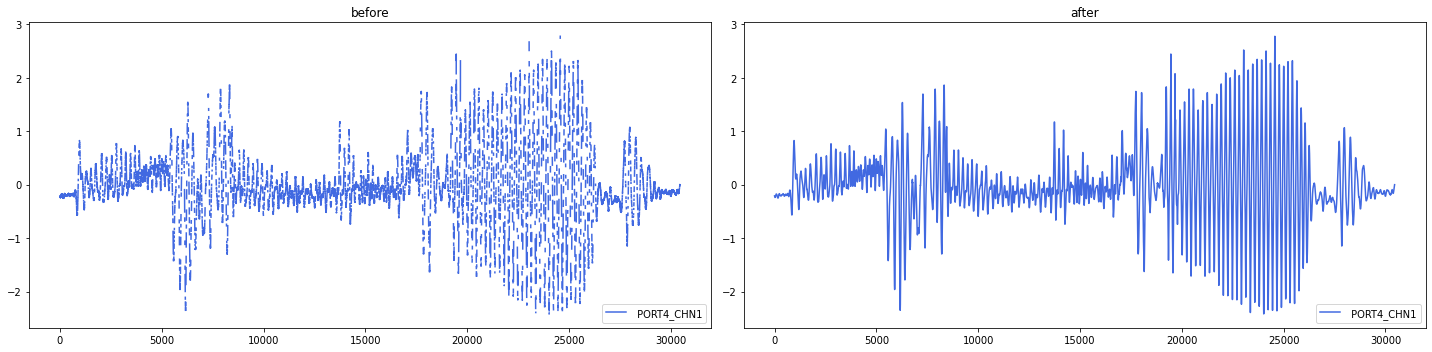

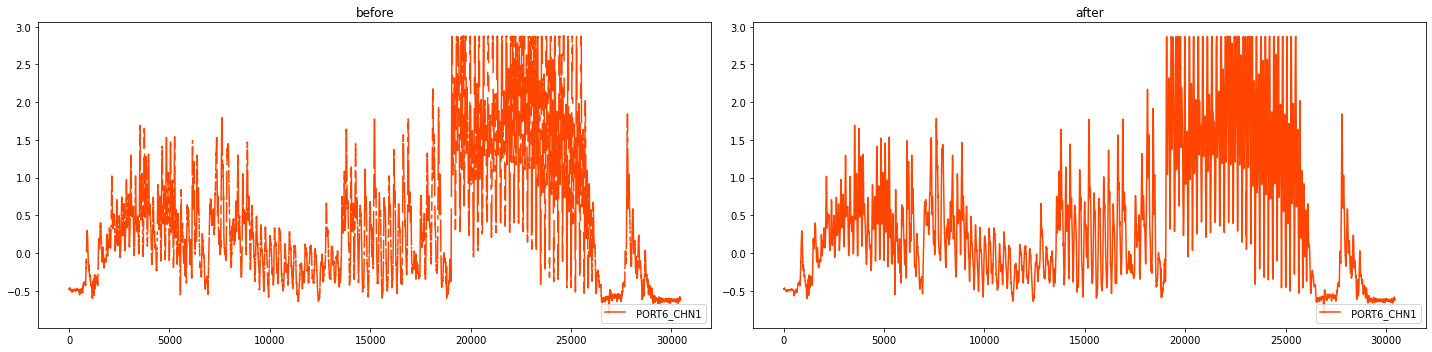

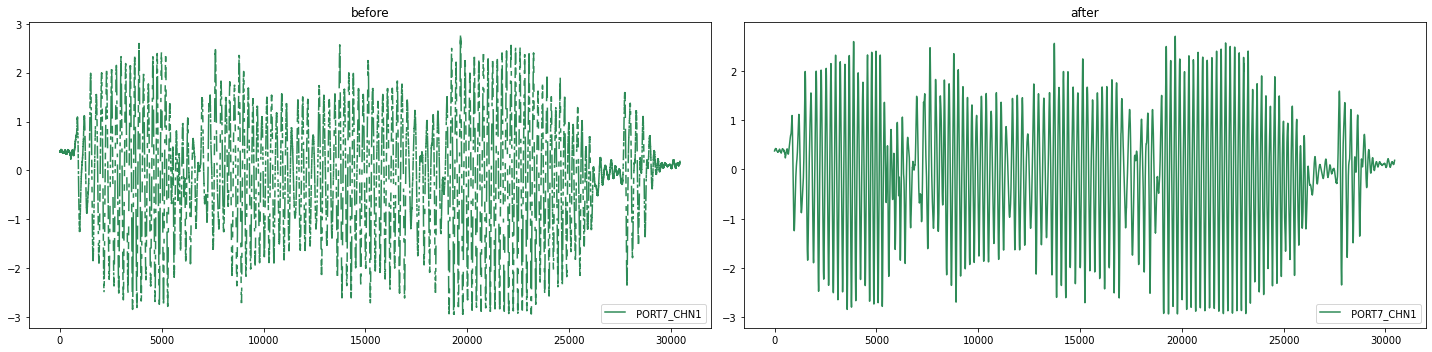

In [144]:
c=0 #c는 0으로 초기화
color=['royalblue','orangered','seagreen'] #컬러 리스트 세개 선언
title=['before','after'] #제목 리스트 두개 선언
for column in [' PORT4_CHN1', ' PORT6_CHN1', ' PORT7_CHN1']: #column을 돌면서
    fig, ax= plt.subplots(1,2,figsize=(20,5)) #1X2 그래프 작성, 사이즈는 20,10
    i=0 #초기화
    t=0 
    for datalist in[data,Adata]: #원본 데이터와 Adata만 활용
        ax[i].plot(datalist[column],label=column,color=color[c]) #반복문을 통해 data, Adata 각각 플랏
        ax[i].legend(loc='lower right') # 라벨링 오른쪽 밑
        ax[i].set_title(title[t]) #타이틀 리스트를 통해 비포 애프터 제목 라벨링
        if(i==0): #1X2 서브플랏이므로 ax [0], ax[1] 로 나눌 수 있다. 따라서 i=0 i=1 일때 t 와 i 로 0,1을 조절하고 이를통해 리스트에서 원하는ㄴ 요소를 추출한다.
            i+=1
            t+=1
        else:
            i-=1    
            t-=1
    c += 1
    fig.tight_layout() #그래프 간격 유지





플랏 A 에 관한 결과 분석을 먼저 해보겠다. 코드에 관한 설명은 주석을 참고하면 될 것 같다.
이 부분에서는 결측치를 dropna를 통해 결측치였던 부분을 다 제거하고 플랏을 찍은 것으로, 육안으로 봐도 x축의 값들이 좀 비는 것을 확인할 수있다.

B) Plot

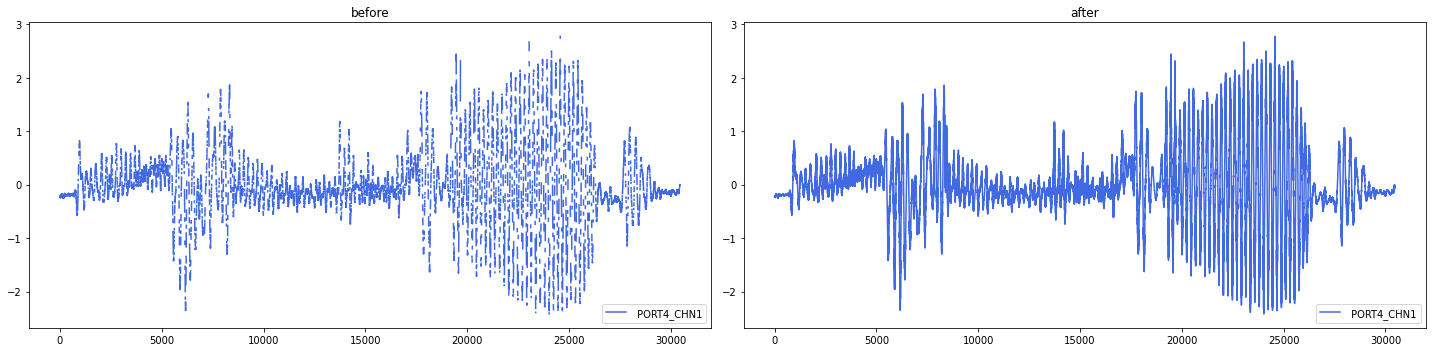

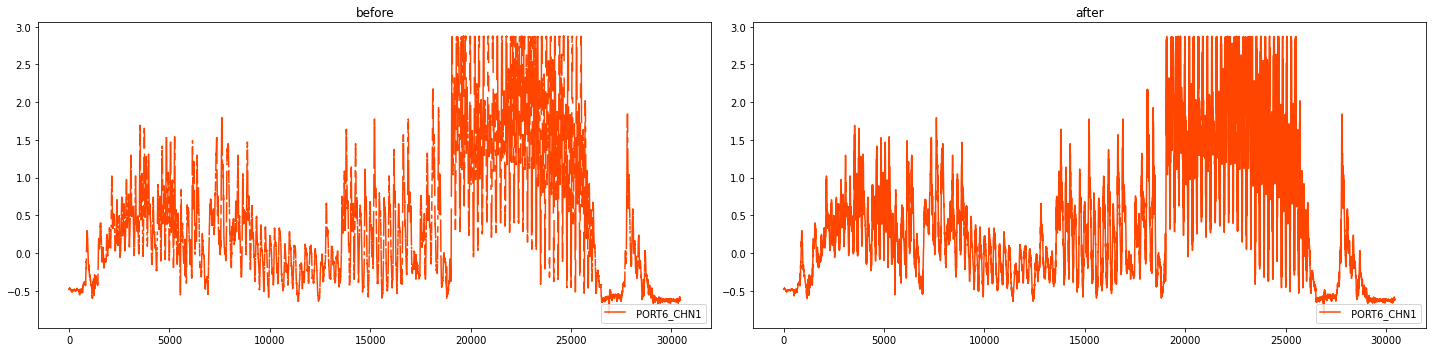

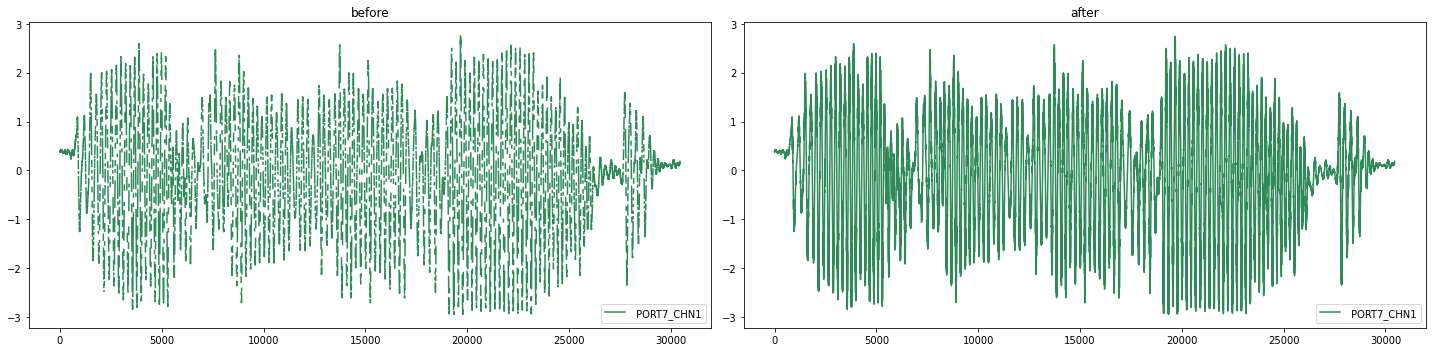

In [145]:
c=0 # A단계 플롯 주석과 동일
color=['royalblue','orangered','seagreen'] #컬러 리스트 세개 선언
title=['before','after']
for column in [' PORT4_CHN1', ' PORT6_CHN1', ' PORT7_CHN1']:
    fig, ax= plt.subplots(1,2,figsize=(20,5))
    i=0
    t=0
    for datalist in[data,Bdata]:
        ax[i].plot(datalist[column],label=column,color=color[c])
        ax[i].legend(loc='lower right')
        ax[i].set_title(title[t])
        if(i==0):
            i+=1
            t+=1
        else:
            i-=1    
            t-=1
    c += 1
    fig.tight_layout() #그래프 간격 유지

B단게를 plot한 것이다. 전과 비교하면 결측치로 인해 비었던 흰부분이 채워졌으며, A와 비교해도 더 빼곡하다는 것을 확인할 수 있다.

C) Plot

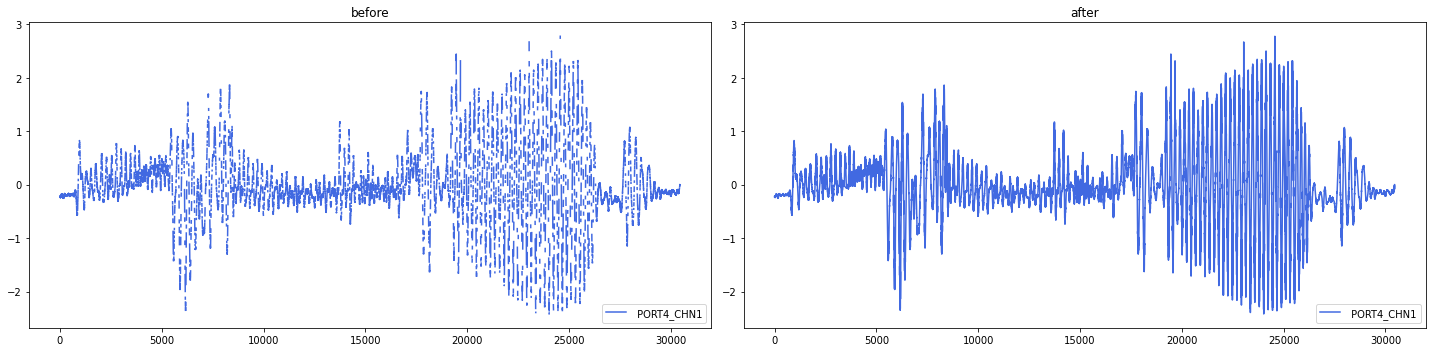

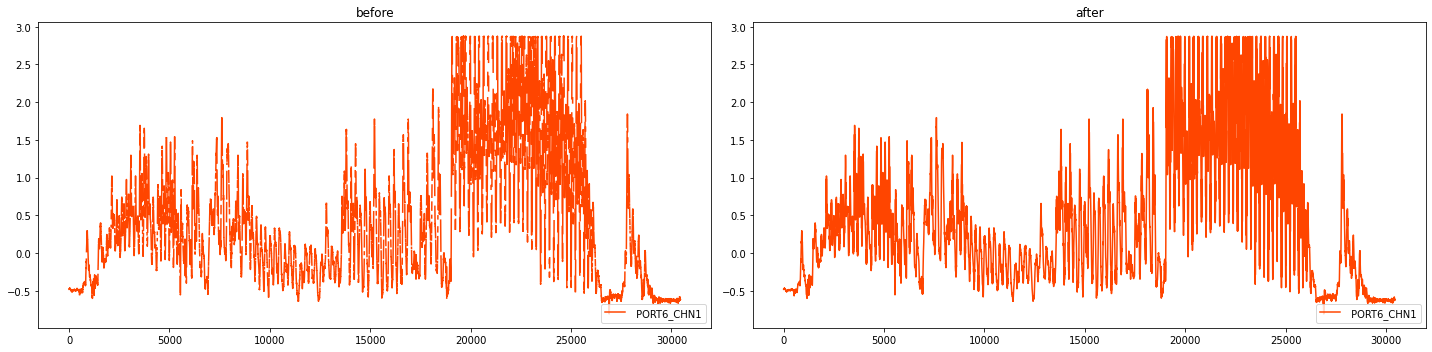

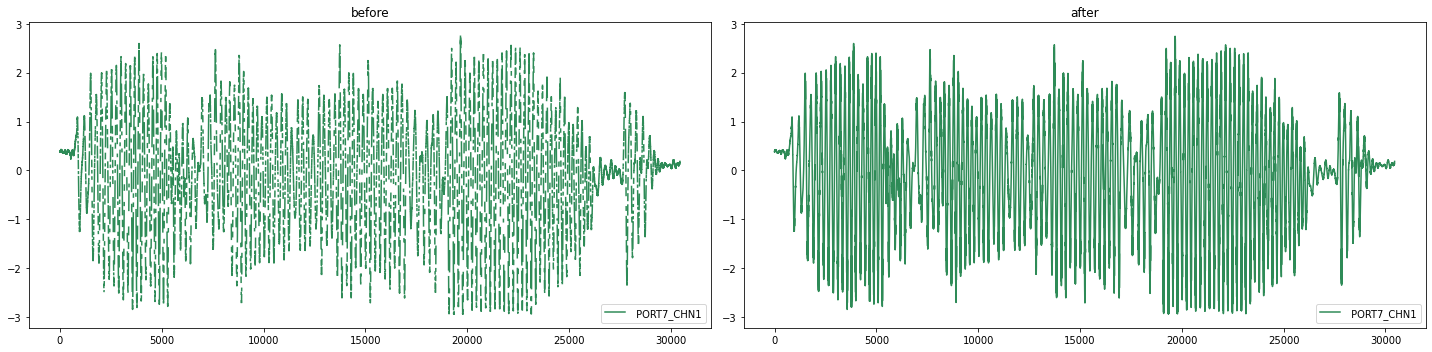

In [146]:
c=0# A단계 플롯 주석과 동일
color=['royalblue','orangered','seagreen'] #컬러 리스트 세개 선언
title=['before','after']
for column in [' PORT4_CHN1', ' PORT6_CHN1', ' PORT7_CHN1']:
    fig, ax= plt.subplots(1,2,figsize=(20,5))
    i=0
    t=0
    for datalist in[data,Cdata]:
        ax[i].plot(datalist[column],label=column,color=color[c])
        ax[i].legend(loc='lower right')
        ax[i].set_title(title[t])
        if(i==0):
            i+=1
            t+=1
        else:
            i-=1    
            t-=1
    c += 1
    fig.tight_layout() #그래프 간격 유지

C 단계, 즉 결측치를 median 값으로 대체한 것을 plot 한 것이다. 마찬가지로 결측치로 비었던 부분들이 채워진것을 볼 수있다. 다른 단계들과 정확한 비교를 위해 차후 밑에서 plot했던 것들을 다 모은다음 비교하도록 하겠다.

D) Plot

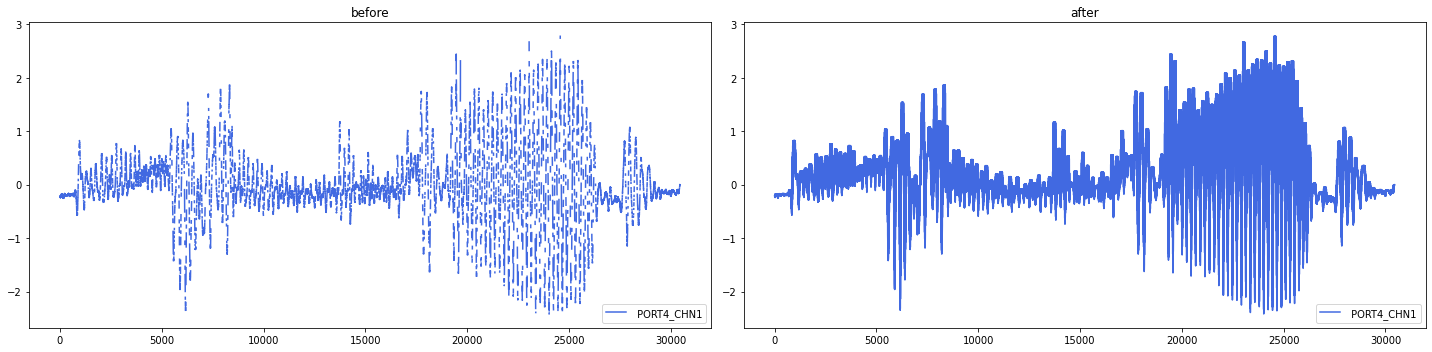

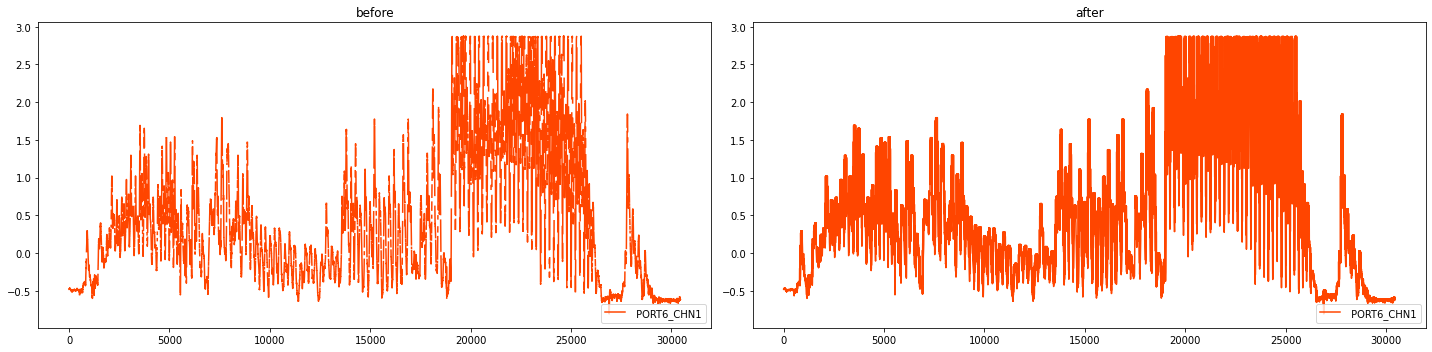

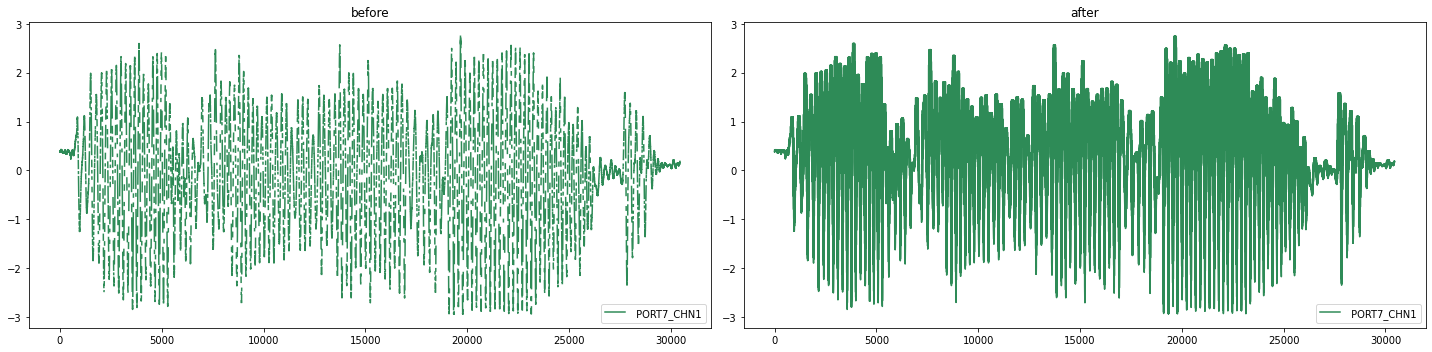

In [147]:
c=0# A단계 플롯 주석과 동일
color=['royalblue','orangered','seagreen'] #컬러 리스트 세개 선언
title=['before','after']
for column in [' PORT4_CHN1', ' PORT6_CHN1', ' PORT7_CHN1']:
    fig, ax= plt.subplots(1,2,figsize=(20,5))
    i=0
    t=0
    for datalist in[data,Ddata]:
        ax[i].plot(datalist[column],label=column,color=color[c])
        ax[i].legend(loc='lower right')
        ax[i].set_title(title[t])
        if(i==0):
            i+=1
            t+=1
        else:
            i-=1    
            t-=1
    c += 1
    fig.tight_layout() #그래프 간격 유지

D 단계, 즉 결측치를 max 값으로 대체한 것을 plot 한 것이다. 마찬가지로 결측치로 비었던 부분들이 채워진것을 볼 수있다. 다른 단계들과 정확한 비교를 위해 차후 밑에서 plot했던 것들을 다 모은다음 비교하도록 하겠다.

E) Plot

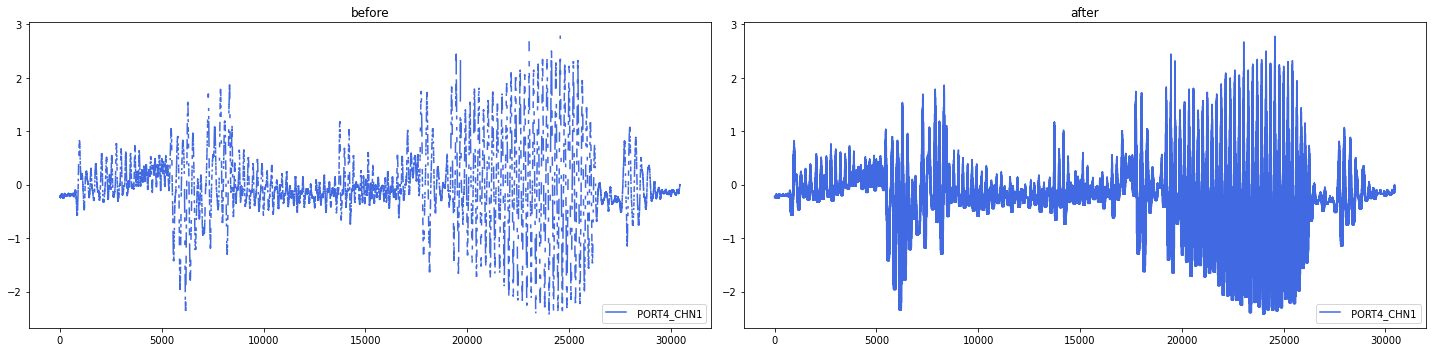

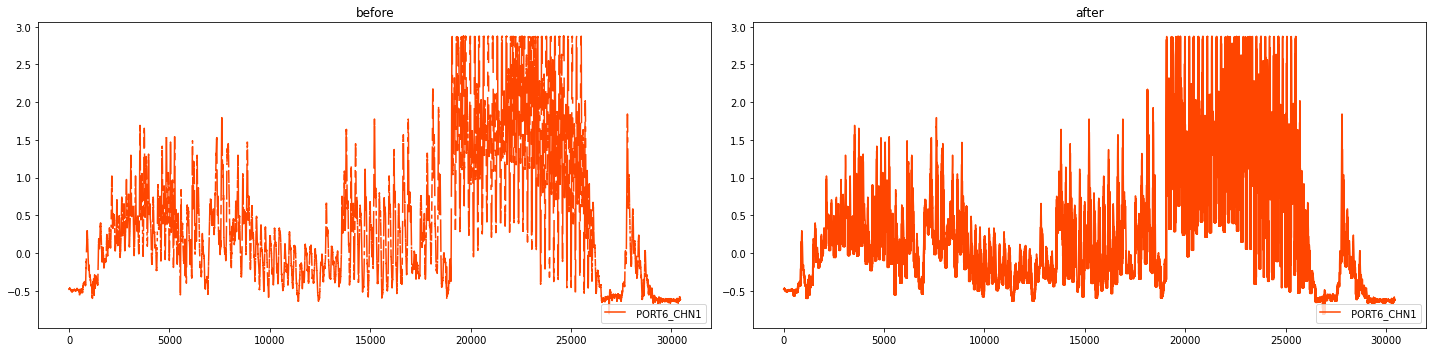

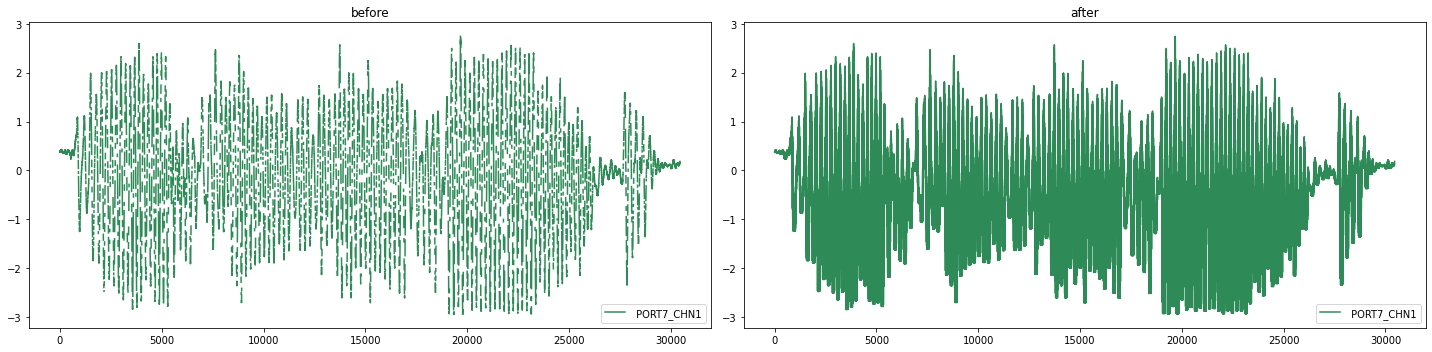

In [148]:
c=0# A단계 플롯 주석과 동일
color=['royalblue','orangered','seagreen'] #컬러 리스트 세개 선언
title=['before','after']
for column in [' PORT4_CHN1', ' PORT6_CHN1', ' PORT7_CHN1']:
    fig, ax= plt.subplots(1,2,figsize=(20,5))
    i=0
    t=0
    for datalist in[data,Edata]:
        ax[i].plot(datalist[column],label=column,color=color[c])
        ax[i].legend(loc='lower right')
        ax[i].set_title(title[t])
        if(i==0):
            i+=1
            t+=1
        else:
            i-=1    
            t-=1
    c += 1
    fig.tight_layout() #그래프 간격 유지

E단계, 즉 결측치를 min 값으로 대체한 것을 plot 한 것이다. 마찬가지로 결측치로 비었던 부분들이 채워진것을 볼 수있다. 다른 단계들과 정확한 비교를 위해 차후 밑에서 plot했던 것들을 다 모은다음 비교하도록 하겠다.

In [149]:
data

nSeq   DI   PORT4_CHN1   PORT6_CHN1   PORT7_CHN1
0          0    0          NaN      -0.4806       0.3770
1          1    0      -0.2104      -0.4819       0.3759
2          2    0      -0.2103      -0.4822          NaN
3          3    0      -0.2119      -0.4819       0.3806
4          4    0      -0.2148      -0.4812          NaN
...      ...  ...          ...          ...          ...
30445  30445    0          NaN      -0.6162       0.1777
30446  30446    0      -0.0034      -0.6157       0.1780
30447  30447    0      -0.0037      -0.6145       0.1772
30448  30448    0       0.0000      -0.6157       0.1820
30449  30449    0       0.0005      -0.6144       0.1855

[30450 rows x 5 columns]

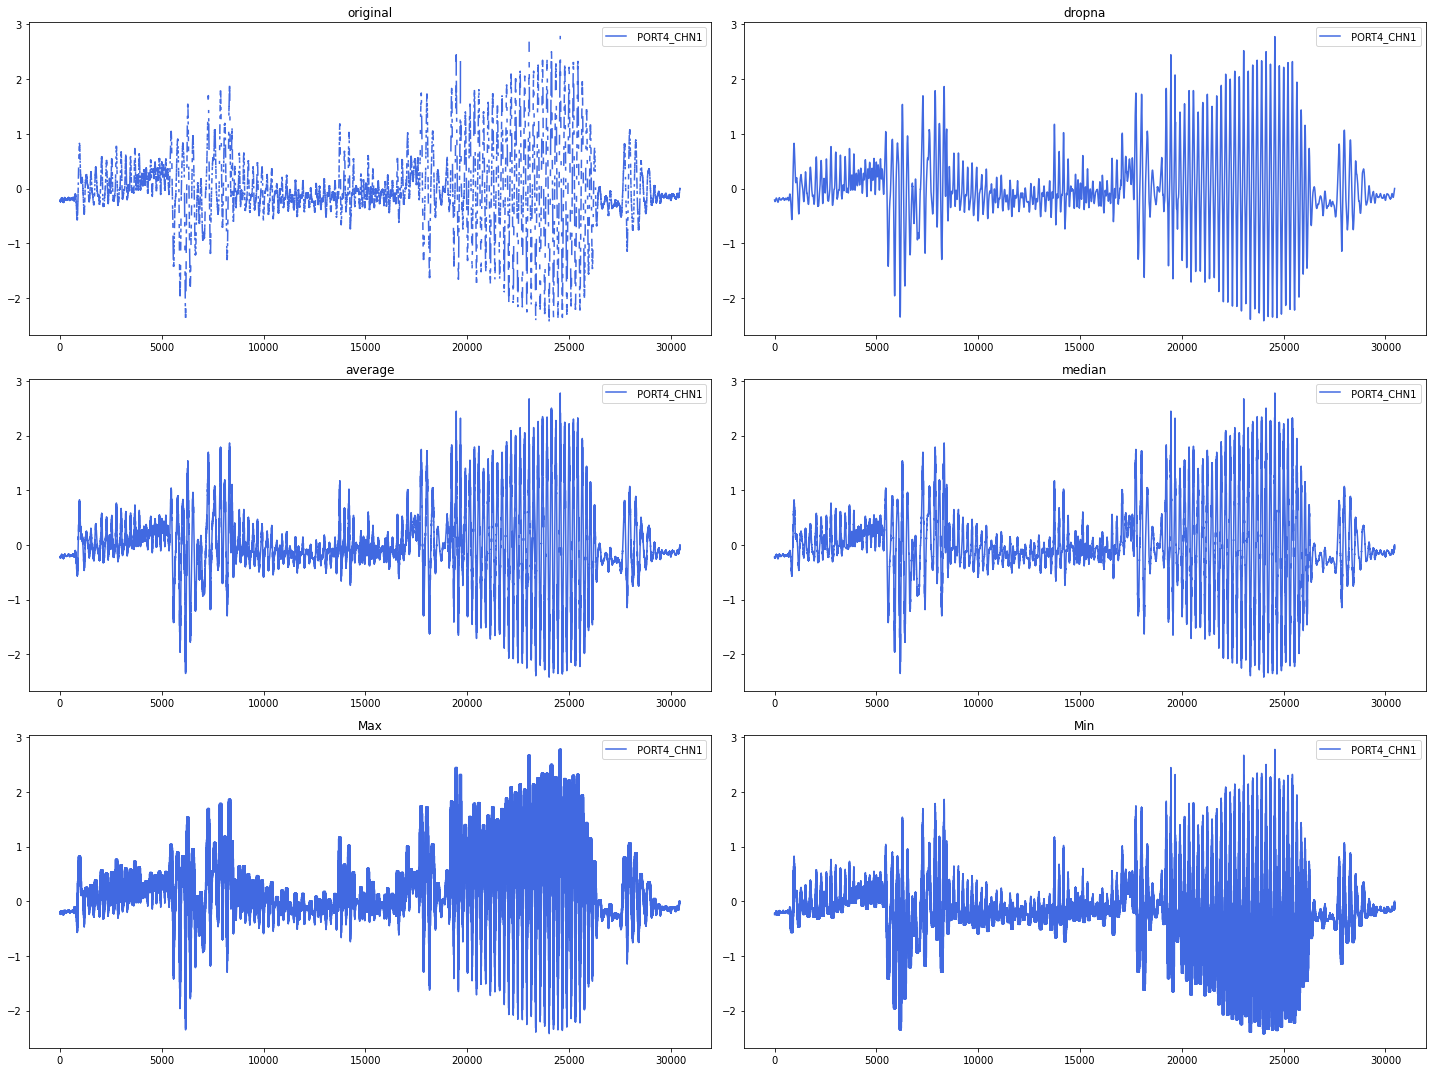

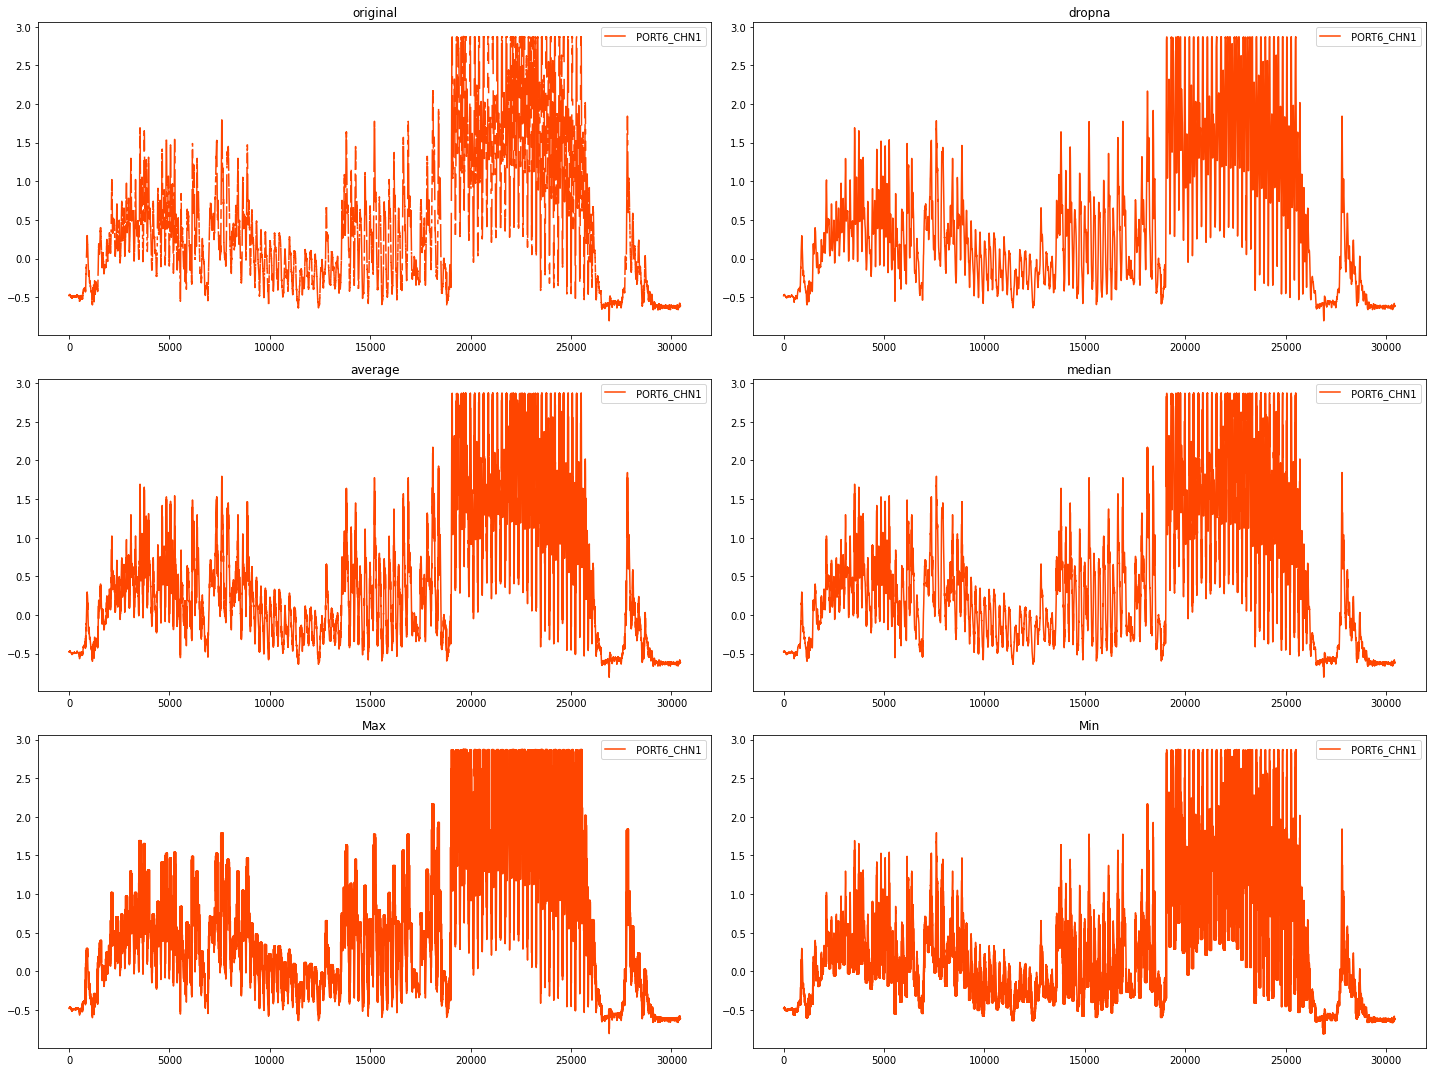

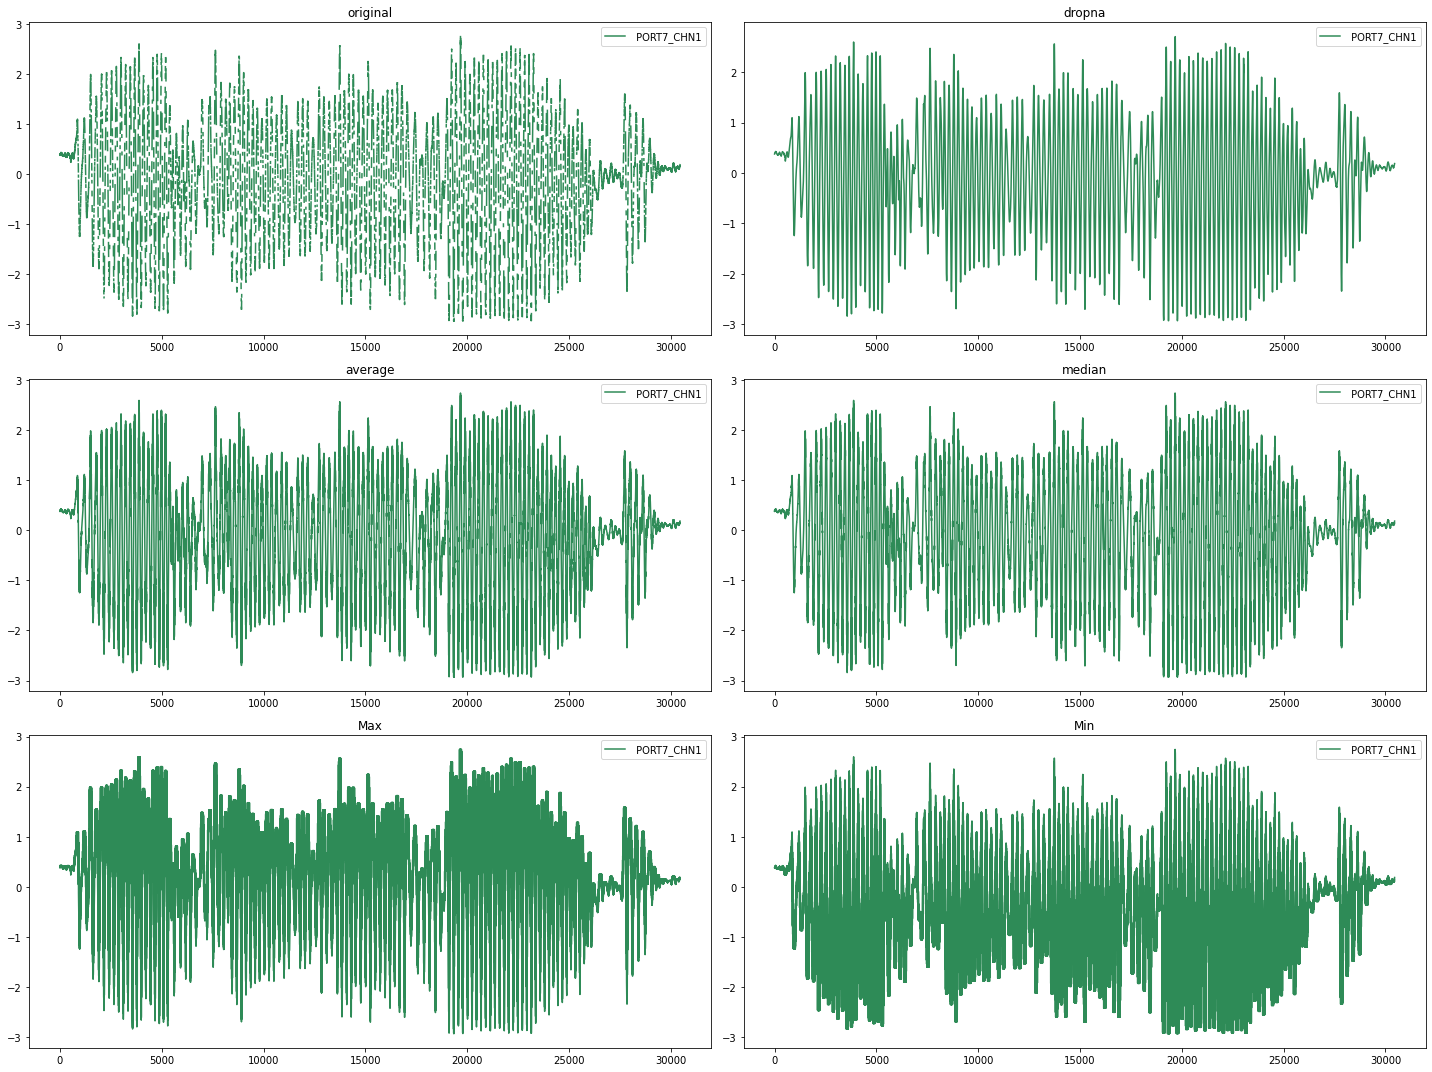

In [150]:
#전체 비교를 위해 모든 데이터를 불러왔다. 이를 위해서 위 플롯과 다른 점은 data list 의 요소가 6개로 늘어 났으며, 3X2 이기 때문에 i 뿐만 아니라 j를 활용한 2차열 배열로 위치를
#조정한다. 전체적인 방식은 위와 동일하다.

column_list = [' PORT4_CHN1', ' PORT6_CHN1', ' PORT7_CHN1']
data_list = [data, Adata, Bdata, Cdata, Ddata, Edata]
title_list = ['original','dropna', 'average', 'median', 'Max', 'Min']
color_list=['royalblue','orangered','seagreen'] #컬러 리스트 세개 선언
c = 0 #color지정을 위한 변수
for column in column_list:
    fig, ax = plt.subplots(3, 2, figsize=(20, 15)) #한 figure에 그래프를 6개 그리기 위해 초기화
    i = 0 #plot 위치 지정을 위한 변수
    j = 0 #plot 위치 지정을 위한 변수
    k = 0 #title 지정을 위한 변수
    for data in data_list:
        ax[i][j].plot(data[column], label=column, color = color_list[c]) #해당하는 그래프 그리기
        ax[i][j].legend(loc='upper right') #라벨명 위치 설정
        ax[i][j].set_title(title_list[k]) #그래프 제목 설정
        if(j==0):
            j += 1 
            k += 1 
        else:
            j -= 1
            i += 1
            k += 1
            
    c += 1
    fig.tight_layout() #그래프 간격 유지

## 결과분석
각각 단계별로 plot한 것을 가지고는 어떤 부분들이 차이가 있는지 한 눈에 식별하기 쉽지않아 각 데이터별로 단계들을 모아서 한꺼번에 plot해보았다. 주석을 통해 코드를 보면 된다. 전체 적으로 결과들이 요구조건에 맞게 잘 나온걸 확인할 수 있다. 각각 어떤 데이터를 나타냈는지는 그래프 위에 original dropna average median max min으로 적어놓았다. dropna를 통해 결측값을 다 빼고 처리한 데이터가 예상했던 것처럼 다른 데이터보다 듬성등성하게 plot되어있는 것을 확인할 수있다. 평균값과 중간 값으로 대체된 두개의 단계의 데이터는 육안으로는 큰 차이를 식별하기 힘들만큼 유사한 것을 알 수있고, 그래프의 가운데 부분이 비교적 그래프의 위 아래보다 진하게 찍혀있었고, 이를 통해 평균과 중간 값이 잘 구현됐음을 알 수있다. 데이터의 특성상 평균과 중간값이 큰 차이를 보이지 않아 두 개의 차이를 식별하기 힘들었다. 이는 데이터가 만약 지금과 다르다면 평균과 중간값의 차이를 보일 수 있고, 그렇다면 그래프의 모양도 달라질 수 있다고 생각한다. max 와 min 으로 처리한 그래프는 각각 위와 아래 부분이 진한 것을 한 눈에 봐도 알 수 있었다. 이를 통해 요구조건에 맞게 잘 구현됐음을 확인할 수 있다. 각각의 단계별 그래프마다 어느 것이 좋고 어느 것이 나쁘다고 판단할 수는 없는 것 같다. 조작되지 않은 그래프의 값들만을 보고 싶다면 dropna를 통해 만든 데이터의 값을 사용하는 것이 가장 좋고, 평균값과 중앙값 같은 경우, 데이터의 양을 채우면서 데이터의 대체적인 분포를 확인할 때 좋을 것 같고, max나 min 같은 경우 한 쪽으로 치우쳤을때 어떤 결과가 나올지 확인하고 싶을때 쓰면 유용할 것이다. 이를 통해 데이터를 클렌징할때 여러가지 관점에서 처리할 수 있어야 하고, 원하는 상황에 맞추어 그에 맞는 적절한 데이터를 사용하는 것이 중요하다고 생각한다. 결과 값 추출 과정에서 get_min(data,column, index, window) 를 예를 들었을때 처음에 복사된 데이터인 Edata를 넣어 get_min(Edata,column, index, window)로 추출했었는데 , 이렇게 되면 순차적으로 진행하는 과정에서 이전의 결측치<-> 새로운 값을 대체해서 데이터에 들어간 값이 이후에 함수를 통해 값을 추출하는 과정에서 영향을 줘 결과적으로 플롯을 해보면 블럭 형태로 데이터 틀 손실이 많이 일어난 것 처럼 보였다. 이를 해결하기 위해 get_min(data,column, index, window)처럼 값 을 리턴할때 원시 데이터를 넣어주었고, 이렇게 되면 모든 인덱스가 기존 원시데이터 기준으로 min max average median 값을 계산 하기 때문에 플랏 했을 때도 모양이 데이터 손실이 크게 발생하지 않는 것처럼 나타난다.

## Problem 2. Data Parsing

### 1) Parsing ‘Main Execution Interval’

A) Find the index with the median value for each parameter

In [151]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

data = pd.read_csv("/Users/kimdaehun/Desktop/dataset/ds_hw1_dataset.csv")


In [152]:
data

nSeq   DI   PORT4_CHN1   PORT6_CHN1   PORT7_CHN1
0          0    0          NaN      -0.4806       0.3770
1          1    0      -0.2104      -0.4819       0.3759
2          2    0      -0.2103      -0.4822          NaN
3          3    0      -0.2119      -0.4819       0.3806
4          4    0      -0.2148      -0.4812          NaN
...      ...  ...          ...          ...          ...
30445  30445    0          NaN      -0.6162       0.1777
30446  30446    0      -0.0034      -0.6157       0.1780
30447  30447    0      -0.0037      -0.6145       0.1772
30448  30448    0       0.0000      -0.6157       0.1820
30449  30449    0       0.0005      -0.6144       0.1855

[30450 rows x 5 columns]

In [153]:
part2data = data.copy()
medians ={' PORT4_CHN1':[], ' PORT6_CHN1':[], ' PORT7_CHN1':[]}# 중간값을 넣어놓는 딕셔너리
medians_index = {' PORT4_CHN1':[], ' PORT6_CHN1':[], ' PORT7_CHN1':[]}#그에 대한 인덱스를 넣어 놓는 딕셔너리
for column in [' PORT4_CHN1', ' PORT6_CHN1', ' PORT7_CHN1']: #column을 돌면서
    medians[column]= part2data[column].median() #medians에 .median()을 통한 중간 값을 각 열 마다 구분해서 넣는다
print(medians)    
for column in [' PORT4_CHN1', ' PORT6_CHN1', ' PORT7_CHN1']: #column을 돌면서
    for index in range(len(part2data)): #데이터 길이 만큼 인덱스 탐색
        if medians[column]==part2data.loc[index,column]: # 데이터 값이 medians값과 동일한 인덱스 찾기
            medians_index[column].append(index)#찾으면 medians_index에 넣는다.

print(medians_index)            

        

{' PORT4_CHN1': -0.0835, ' PORT6_CHN1': 0.18080000000000002, ' PORT7_CHN1': 0.0547}
{' PORT4_CHN1': [1844, 11729, 13147, 13631, 13690, 14880, 15049, 15761, 26545, 27011, 27634, 28200], ' PORT6_CHN1': [], ' PORT7_CHN1': [26194, 29621, 29640, 29642]}


medians, medians_index를 각각 만들어 놨으며, 각각 데이터 프레임의 열마다 median 값은 medians, 그에 대한 인덱스는 medians_index에 들어간다. 딕셔너리 형태로 만들어 놓았다. 코드 설명은 주석을 통해 확인하면 된다. 결과만 놓고 봤을때, 각 열마다의 중간 값은 잘 나오고, 그 값을 가지는 인덱스는 port4에서는 12개 port7에서는 4개가 나왔는데, port6에서는 하나도 없는 점을 확인할 수 있다.

In [154]:
def find_nearest(array, value):
    b1=0
    c1=[]
    for i in range(len(part2data)):
        b1= abs(value-array[i])
        c1.append(b1) 
    d1= pd.DataFrame(c1, columns=['b1'])
    answer= np.min(d1)
    return np.where(d1 == answer)[0]
ffn6=find_nearest(data.loc[:,' PORT6_CHN1'],medians[' PORT6_CHN1'])    
for i in range (len(ffn6)):
        medians_index[' PORT6_CHN1'].append(ffn6[i])
print( medians_index[' PORT6_CHN1'])    
    

[1483, 5608, 15535]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


따라서 내 기준을 임의로 만들었는데, 이 코드는 part2-2 를 해결하고 난 이후에 그 기준을 그대로 적었다. 코드 설명은 차후 파트 2-2에서 진행하겠다. 간단하게 설명하자면 중간값과 겹치는 데이터 값을 가진 인덱스가 port6에는 존재하지 않아, 이와 가장 가까운 값을 가지는 인덱스를 찾는 함수를 구현했고, 여기서 나온 값들을 medians_index['port6_CHN1']에 첨부하여 딕셔너리를 완성햇다.

In [155]:
print(medians_index)

{' PORT4_CHN1': [1844, 11729, 13147, 13631, 13690, 14880, 15049, 15761, 26545, 27011, 27634, 28200], ' PORT6_CHN1': [1483, 5608, 15535], ' PORT7_CHN1': [26194, 29621, 29640, 29642]}


완성된 딕셔너리를 프린트했다

B) Extract data as much as 15% of the total data length back and forth around the index of A) for each parameter.

In [156]:
for column in [' PORT4_CHN1', ' PORT6_CHN1', ' PORT7_CHN1']: #column을 돌면서
    print(medians_index[column])


[1844, 11729, 13147, 13631, 13690, 14880, 15049, 15761, 26545, 27011, 27634, 28200]
[1483, 5608, 15535]
[26194, 29621, 29640, 29642]


열을 각각 돌면서 열마다 인덱스 값을 추출했다

In [157]:
A=len(part2data)*0.15
length= int(len(part2data)*0.15) #전체 데이터의 15%길이 측정

parsed_data=[] #리스트 생성

for column in [' PORT4_CHN1',' PORT6_CHN1',' PORT7_CHN1']:
    for i_ndex in medians_index[column]:# medians_index안에 있는 요소들을 탐색
        if i_ndex-length<0: #평균값을 가진 인덱스-length가 0보다 작을경우,
                parsed_data.append(pd.DataFrame(part2data.loc[0:i_ndex+length][column]))#전체 데이터 0부터 요소+length까지 그룹화 후 리스트에 추가
        elif i_ndex+length>len(part2data):# 평균값을 가진 익덱스+length가 전체 데이터 마지막 index보다 클경우
                parsed_data.append(pd.DataFrame(part2data.loc[i_ndex-length:len(part2data)][column]))#요소-length부터 전체 데이터 마지막 까지 그룹화 후 리스트에 추가
        else: #둘 다 아니면
                parsed_data.append(pd.DataFrame(part2data.loc[i_ndex-length:i_ndex+length][column]))#요소-length  부터 요소 +length까지 그룹화 후 리스트 추가
parsed_data                


[       PORT4_CHN1
 0             NaN
 1         -0.2104
 2         -0.2103
 3         -0.2119
 4         -0.2148
 ...           ...
 6407      -1.7621
 6408      -1.7534
 6409      -1.7402
 6410          NaN
 6411      -1.7144
 
 [6412 rows x 1 columns],
         PORT4_CHN1
 7162       -0.0095
 7163           NaN
 7164           NaN
 7165       -0.0132
 7166       -0.0156
 ...            ...
 16292      -0.1226
 16293      -0.1199
 16294      -0.1157
 16295      -0.1133
 16296      -0.1094
 
 [9135 rows x 1 columns],
         PORT4_CHN1
 8580        0.3889
 8581        0.3939
 8582           NaN
 8583        0.3997
 8584        0.4016
 ...            ...
 17710       1.2954
 17711          NaN
 17712       1.3247
 17713       1.3406
 17714       1.3555
 
 [9135 rows x 1 columns],
         PORT4_CHN1
 9064        0.0846
 9065           NaN
 9066        0.0400
 9067        0.0156
 9068       -0.0059
 ...            ...
 18194      -0.3979
 18195      -0.3760
 18196      -0.3530
 18197  

먼저 전체 데이터에서 15% 길이를 추출하기 위해 A에 식을 대입해서 길이를 알아내었고, 소수점으로 값이 나와 int형으로 반환하여 소수점을 버렸다. 그 후 parsed_data라는 리스트를 하나 생성했고, medians_index를 각 포트마다 돌면서, 
medians_index안에있는 요소의 값에 length를 빼서, 0보다 작을 경우 전체 데이터에서 제일 처음 인덱스부터, 확인하는 인덱스 기준+length만큼 한 그룹이 지어지게 된다. 이를 데이터 프레임화 시켜 parsed_data 리스트 안에 추가하였다.
만약 medians_index안에 있는 요소+length가 데이터 크기보다 크다면, 요소-length부터 전체데이터의 마지막 행 값까지 그룹을 지어주면된다. 그리고 이렇게 그룹을 지어준 것을 parsed_data 리스트 안에 추가하였고, 위의 두조건에 해당하지 않을 경우는 그냥 medians_index 안에 있는 요소-length 부터 요소+length까지 그룹화를 시켜 parsed_data리스트 안에 넣어주면된다.


C) Organize the result data to data type “dict” with Key and Value

In [158]:
parse_to_dict = [] #딕셔너리화할 파싱 데이터를 저장할 리스트
for index in range(len(parsed_data)): #column을 돌며
   
        parse_to_dict.append(parsed_data[index].to_dict()) #딕셔너리화
        
parse_to_dict #딕셔너리화한 파싱 데이터 확인

[{' PORT4_CHN1': {0: nan,
   1: -0.2104,
   2: -0.2103,
   3: -0.2119,
   4: -0.2148,
   5: -0.2156,
   6: nan,
   7: nan,
   8: -0.2209,
   9: -0.2227,
   10: -0.2253,
   11: nan,
   12: -0.2278,
   13: nan,
   14: nan,
   15: -0.2322,
   16: nan,
   17: -0.2349,
   18: nan,
   19: nan,
   20: nan,
   21: nan,
   22: -0.2374,
   23: -0.2383,
   24: -0.24,
   25: nan,
   26: nan,
   27: -0.2393,
   28: -0.2397,
   29: nan,
   30: -0.2378,
   31: -0.2373,
   32: nan,
   33: nan,
   34: -0.2358,
   35: nan,
   36: -0.2373,
   37: nan,
   38: -0.2339,
   39: nan,
   40: -0.2311,
   41: -0.23,
   42: -0.23,
   43: -0.2285,
   44: -0.2261,
   45: nan,
   46: -0.2231,
   47: -0.2227,
   48: nan,
   49: -0.2202,
   50: -0.2183,
   51: nan,
   52: -0.2158,
   53: -0.2144,
   54: -0.2119,
   55: nan,
   56: nan,
   57: nan,
   58: -0.2056,
   59: -0.2056,
   60: -0.2021,
   61: -0.2021,
   62: -0.2,
   63: -0.1989999999999999,
   64: -0.1973,
   65: nan,
   66: -0.1947,
   67: nan,
   68: nan,


parsed_data를 하나씩 돌며, 이를 to_dict()를 통해 딕셔너리화 해서 parse_to_dict라는 리스트에 저장시킨다.

D) Save the result as a json file.

In [159]:
#json.dump
import json
dict =(parse_to_dict)
with open('./data.json','w')as f:
    json.dump(dict,f,ensure_ascii=False,indent=4)

parse_to _dict 내용이 data.json파일로 디렉토리에 저장된다.

### 2) Parsing ‘Main Execution Interval’

A) Find the index with the average value for each parameter

In [160]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

data = pd.read_csv("/Users/kimdaehun/Desktop/dataset/ds_hw1_dataset.csv")


In [161]:
part2data = data.copy()
averages ={' PORT4_CHN1':[], ' PORT6_CHN1':[], ' PORT7_CHN1':[]}#평균값을 담을 딕셔너리 생성
averages_index = {' PORT4_CHN1':[], ' PORT6_CHN1':[], ' PORT7_CHN1':[]}#인덱스를 담을 딕셔너리 생성 
for column in [' PORT4_CHN1', ' PORT6_CHN1', ' PORT7_CHN1']: #column을 돌면서
    averages[column]= part2data[column].mean() #열마다 평균값을 averages에 열마다 분류해 담는다
print(averages)  

for column in [' PORT4_CHN1', ' PORT6_CHN1', ' PORT7_CHN1']: #column을 돌면서
    for index in range(len(part2data)):
        if averages[column]==part2data.loc[index,column]:#데이터의 값이 평균과 같다면
            averages_index[column].append(index) # aveages_index에 저장

print(averages_index) 

{' PORT4_CHN1': -0.000945556157368655, ' PORT6_CHN1': 0.42242629272885285, ' PORT7_CHN1': -0.0670108230226764}
{' PORT4_CHN1': [], ' PORT6_CHN1': [], ' PORT7_CHN1': []}


파트 2-1과 같은 방식으로 먼저 진행해봤는데, 인덱스가 하나도 나오지 않는다 port 4 6 7 모두 임의의 기준을 가지고 모델을 만들어야 한다.

In [162]:
part2data = data.copy()
averages ={' PORT4_CHN1':[], ' PORT6_CHN1':[], ' PORT7_CHN1':[]}
averages_index = {' PORT4_CHN1':[], ' PORT6_CHN1':[], ' PORT7_CHN1':[]}
for column in [' PORT4_CHN1', ' PORT6_CHN1', ' PORT7_CHN1']: #column을 돌면서
    averages[column]= part2data[column].mean()
print(averages)  

{' PORT4_CHN1': -0.000945556157368655, ' PORT6_CHN1': 0.42242629272885285, ' PORT7_CHN1': -0.0670108230226764}


일단 다시 평균값이 무엇인지 작성해놓는다.

In [163]:

averages_index = {' PORT4_CHN1':[], ' PORT6_CHN1':[], ' PORT7_CHN1':[]}
def find_nearest(array, value):# 함수 생성
    b=0#초기화
    c=[]# 빈 리스트 생성
    for i in range(len(part2data)):#데이터 길이를 돌며
        b= abs(value-array[i]) #각 열의 평균과-데이터의 값을 뺸 후 절댓값 씌운다
        c.append(b) # c라는 빈 리스트에 값들을 집어 넣는다
    d= pd.DataFrame(c, columns=['b'])# c를 데이터 프레임화 한다.
    answer= np.min(d)# 데이터 값들중 가장 작은 값을 추출한다
    return np.where(d == answer)[0]# 이 값을 가진 인덱스를 추출한다.


fn4=find_nearest(data.loc[:,' PORT4_CHN1'],averages[' PORT4_CHN1'])
fn6=find_nearest(data.loc[:,' PORT6_CHN1'],averages[' PORT6_CHN1'])
fn7=find_nearest(data.loc[:,' PORT7_CHN1'],averages[' PORT7_CHN1'])

#각 각 열마다 함수를 통해 인덱스 추출


for i in range (len(fn4)):
        averages_index[' PORT4_CHN1'].append(fn4[i])
print( averages_index[' PORT4_CHN1'])    

for i in range (len(fn6)):
        averages_index[' PORT6_CHN1'].append(fn6[i])
print( averages_index[' PORT6_CHN1'])    

for i in range (len(fn7)):
        averages_index[' PORT7_CHN1'].append(fn7[i])
print( averages_index[' PORT7_CHN1'])    

averages_index
#그 후 averages_index에 열마다 분리해서 나온 인덱스 값들을 넣는다.

[3597, 9658, 13531, 14810, 18797, 19178, 19716]
[2512, 7122, 28057]
[21759, 27650]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  r

{' PORT4_CHN1': [3597, 9658, 13531, 14810, 18797, 19178, 19716],
 ' PORT6_CHN1': [2512, 7122, 28057],
 ' PORT7_CHN1': [21759, 27650]}

이를 해결하기 위해 나는 평균 값과 가장 가까운 값을 가지는 데이터의 인덱스를 뽑아내기로 설정했다. 이를 위해 그 인덱스를 뽑아내는 함수를 만들었는데, 원리는 평균-데이터 값에 절댓값 을 했을때 그 중에서 가장 차이가 적은 값을 뽑고, 이 값이 위치한 인덱스를 리턴하는 것이다. 코드 과정 중에 c 의 값을 왜 데이터 프레임화 시켜 d로 만들었는지 의문이 있을 수 있다. 이 이유는 결측치 때문인데, 평균-결측치 된 값들도 c 안에 들어있을 것이다. c를 min()해서 최솟값을 찾으면 nan, 즉 결측치를 제외하지 않고 최솟값을 찾으려고 해 nan을 가진 인덱스가 반환된다. 하지만 데이터 프레임화 시켜서 min()을 해보면 part1에서 해봤을때 알 수 있었지만, 결측치는 고려하지 않고 존재하는 값중에서 min값을 찾게 된다. 그렇기 때문에 다음과 같이 설정했다.

B) Extract data as much as 15% of the total data length back and forth around the index of A) for each parameter.

In [164]:
A=len(part2data)*0.15

length= int(len(part2data)*0.15)

parsed_data2=[]

for column in [' PORT4_CHN1',' PORT6_CHN1',' PORT7_CHN1']:
    for i_ndex in averages_index[column]:
        if i_ndex-length<0:
                parsed_data2.append(pd.DataFrame(part2data.loc[0:i_ndex+length][column]))
        elif i_ndex+length>len(part2data):
                parsed_data2.append(pd.DataFrame(part2data.loc[i_ndex-length:len(part2data)][column]))
        else:
                parsed_data2.append(pd.DataFrame(part2data.loc[i_ndex-length:i_ndex+length][column]))
parsed_data2                


[       PORT4_CHN1
 0             NaN
 1         -0.2104
 2         -0.2103
 3         -0.2119
 4         -0.2148
 ...           ...
 8160      -0.1866
 8161      -0.2212
 8162          NaN
 8163          NaN
 8164          NaN
 
 [8165 rows x 1 columns],
         PORT4_CHN1
 5091        0.4326
 5092        0.4290
 5093        0.4302
 5094        0.4265
 5095        0.4236
 ...            ...
 14221          NaN
 14222       0.3027
 14223          NaN
 14224       0.2261
 14225       0.1865
 
 [9135 rows x 1 columns],
         PORT4_CHN1
 8964       -0.2009
 8965           NaN
 8966       -0.1982
 8967           NaN
 8968       -0.1912
 ...            ...
 18094      -0.3237
 18095          NaN
 18096      -0.3892
 18097          NaN
 18098          NaN
 
 [9135 rows x 1 columns],
         PORT4_CHN1
 10243      -0.4714
 10244          NaN
 10245          NaN
 10246          NaN
 10247      -0.4595
 ...            ...
 19373      -0.3984
 19374      -0.3799
 19375      -0.3628
 19376  

part2-1 B 과정과 동일

C) Organize the result data to data type “dict” with Key and Value

In [165]:
parse_to_dict2 = [] #딕셔너리화할 파싱 데이터를 저장할 리스트
for index in range(len(parsed_data2)): #column을 돌며
   
        parse_to_dict2.append(parsed_data2[index].to_dict()) #딕셔너리화
        
parse_to_dict2 #딕셔너리화한 파싱 데이터 확인

[{' PORT4_CHN1': {0: nan,
   1: -0.2104,
   2: -0.2103,
   3: -0.2119,
   4: -0.2148,
   5: -0.2156,
   6: nan,
   7: nan,
   8: -0.2209,
   9: -0.2227,
   10: -0.2253,
   11: nan,
   12: -0.2278,
   13: nan,
   14: nan,
   15: -0.2322,
   16: nan,
   17: -0.2349,
   18: nan,
   19: nan,
   20: nan,
   21: nan,
   22: -0.2374,
   23: -0.2383,
   24: -0.24,
   25: nan,
   26: nan,
   27: -0.2393,
   28: -0.2397,
   29: nan,
   30: -0.2378,
   31: -0.2373,
   32: nan,
   33: nan,
   34: -0.2358,
   35: nan,
   36: -0.2373,
   37: nan,
   38: -0.2339,
   39: nan,
   40: -0.2311,
   41: -0.23,
   42: -0.23,
   43: -0.2285,
   44: -0.2261,
   45: nan,
   46: -0.2231,
   47: -0.2227,
   48: nan,
   49: -0.2202,
   50: -0.2183,
   51: nan,
   52: -0.2158,
   53: -0.2144,
   54: -0.2119,
   55: nan,
   56: nan,
   57: nan,
   58: -0.2056,
   59: -0.2056,
   60: -0.2021,
   61: -0.2021,
   62: -0.2,
   63: -0.1989999999999999,
   64: -0.1973,
   65: nan,
   66: -0.1947,
   67: nan,
   68: nan,


part2-1 C과정과 동일

D) Save the result as a json file.

In [166]:
#json.dump
#json.dump
import json
dict =(parse_to_dict2)
with open('./data2.json','w')as f:
    json.dump(dict,f,ensure_ascii=False,indent=4)

part2-1 D 과정과 동일

##결과분석
part2-1 port6, part2-2 모든 포트에서 처럼, 데이터의 평균 혹은 중간 값과 같은 값을 가진 인덱스가 나오지 않을 경우, 합리적인 근거를 들어 모델을 구현해야되는데, 나는 이 과정에서 평균 혹은 중간 값과 가장 차이가 적은 값을 가진 인덱스를 뽑아내는 것이 이후에 데이터를 사용할때도 가장 오차율이 적게 활용될 수 있을 것이라 생각하여 이와 같은 기준을 잡고 구현하였다. json파일을 확인해 보았을때 C에서 처리한 딕셔너리화된 데이터가 그대로 저장되어 나오는 것을 확인할 수 있었고, 또 다른 요구 조건인 전 후 15%를 추출하는 것 또한 csv파일을 통해 비교해 보았을때 잘 그룹화 되어 추출되는 것을 확인할 수 있었다. 